# Normalisation des données avec Sklearn

Dans ce notebook, on va apprendre à normaliser les données avec sklearn.

# Importation des packages

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Fonction de la régression linéaire coder à la main.

In [11]:
class linear_regression():
  def __init__(self, x, seed=None):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return np.dot(x_1, self._w)

  def compute_cost(self, y, y_hat):

    m, _ = y.shape

    return 1/(2*m) * np.dot((y-y_hat).T, (y-y_hat))

  def fit(self, x, y, learning_rate=0.001, num_iters=200):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    J_history = np.zeros(num_iters)

    for i in range(0, num_iters):

      self._w = self._w - (learning_rate/m) * np.dot(x_1.T, (self.predict(x)-y))

      J_history[i] = self.compute_cost(self.predict(x), y)

    return J_history

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1ghsB3WdBlyLRzvfede0KWDqf9P16KyHl?usp=sharing

In [12]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [13]:
multivariate_regression = np.genfromtxt('/content/drive/MyDrive/Turnover_prediction/multivariate_regression.txt', delimiter=',')

In [14]:
print("Dimension du jeu de données : "+str(multivariate_regression.shape))

Dimension du jeu de données : (47, 3)


# Etude des variables

## Population de la ville

In [15]:
multivariate_regression[:, 0]

array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380.,
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

Afficher la moyenne et le standard deviation de la variable 0.

In [16]:
print(multivariate_regression[:, 0].mean())
print(multivariate_regression[:, 0].std())

2000.6808510638298
786.2026187430467


## Note de la ville

Afficher la moyenne et le standard deviation de la variable 1.

In [17]:
multivariate_regression[:, 1]

array([3., 3., 3., 2., 4., 4., 3., 3., 3., 3., 4., 3., 3., 5., 3., 4., 2.,
       3., 4., 4., 3., 2., 3., 4., 3., 3., 3., 3., 3., 3., 2., 1., 4., 3.,
       4., 3., 3., 4., 4., 4., 2., 3., 4., 3., 2., 4., 3.])

In [18]:
print(multivariate_regression[:, 1].mean())
print(multivariate_regression[:, 1].std())

3.1702127659574466
0.7528428090618781


## Variable cible : chiffre d'affaire

Afficher la moyenne et le standard deviation de la variable 2.

In [19]:
multivariate_regression[:, 2]

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [20]:
print(multivariate_regression[:, 2].mean())
print(multivariate_regression[:, 2].std())

340412.6595744681
123702.5360061474


# Préparation des données

In [21]:
x = multivariate_regression[:, :2]
y = multivariate_regression[:, 2].reshape((multivariate_regression.shape[0], 1))

Utilisez la fonction Sklearn *train_test_split* pour diviser votre ensemble de données en deux ensembles aléatoires.

Utilisez un random_state de 123 et utilisez 10% de votre jeu de données pour l'ensemble de test.

N'hésitez pas à utiliser le [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [23]:
print("Dimension train : "+str(x_train.shape))
print("Dimension train : "+str(x_test.shape))

Dimension train : (35, 2)
Dimension train : (12, 2)


In [24]:
print("Dimension train : "+str(y_train.shape))
print("Dimension train : "+str(y_test.shape))

Dimension train : (35, 1)
Dimension train : (12, 1)


# Régression linéaire sans normalisation des données

## Problème 1 : Convergence du modèle

Initialisation du modèle.

In [25]:
lin_reg = linear_regression(x_train)

Entraînement du modèle

In [26]:
history = lin_reg.fit(x_train, y_train, learning_rate=0.01, num_iters=300)

<ipython-input-11-7d6c0a26d843>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_history[i] = self.compute_cost(self.predict(x), y)
<ipython-input-11-7d6c0a26d843>:25: RuntimeWarning: invalid value encountered in subtract
  self._w = self._w - (learning_rate/m) * np.dot(x_1.T, (self.predict(x)-y))


Visualisation du coût lors de l'entraînement

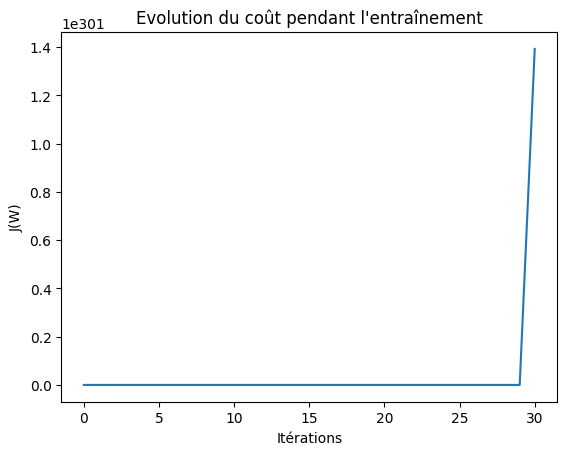

In [27]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

Visualisation de l'évolution du coût.

In [28]:
history

array([1.47443240e+020, 3.42343733e+029, 7.94876940e+038, 1.84559929e+048,
       4.28523782e+057, 9.94975633e+066, 2.31020203e+076, 5.36398403e+085,
       1.24544626e+095, 2.89176174e+104, 6.71428889e+113, 1.55896921e+123,
       3.61972064e+132, 8.40451333e+141, 1.95141701e+151, 4.53093260e+160,
       1.05202272e+170, 2.44265782e+179, 5.67152889e+188, 1.31685411e+198,
       3.05756135e+207, 7.09925369e+216, 1.64835296e+226, 3.82725789e+235,
       8.88638742e+244, 2.06330181e+254, 4.79071433e+263, 1.11234060e+273,
       2.58270799e+282, 5.99670689e+291, 1.39235615e+301,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,  

## Problème 2 : interprétabilité du modèle

Diminution des valeurs du jeu d'entraînement et de test.

In [29]:
x_train_small = x_train / 1000
x_test_small = x_test / 1000

Visualisation des anciennes moyennes.

In [30]:
print(x_train.mean(axis=0))
print(x_test.mean(axis=0))

[2028.68571429    3.17142857]
[1919.            3.16666667]


Visualisation des nouvelles moyennes.

In [31]:
print(x_train_small.mean(axis=0))
print(x_test_small.mean(axis=0))

[2.02868571 0.00317143]
[1.919      0.00316667]


Intialisation d'un nouveau modèle

In [32]:
lin_reg = linear_regression(x_train_small)

Entraînement du modèle prélablement initialisé.

In [33]:
history = lin_reg.fit(x_train_small, y_train, learning_rate=0.01, num_iters=300)

<ipython-input-11-7d6c0a26d843>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_history[i] = self.compute_cost(self.predict(x), y)


Visualisation de l'évolution du coût pendant l'entraînement.

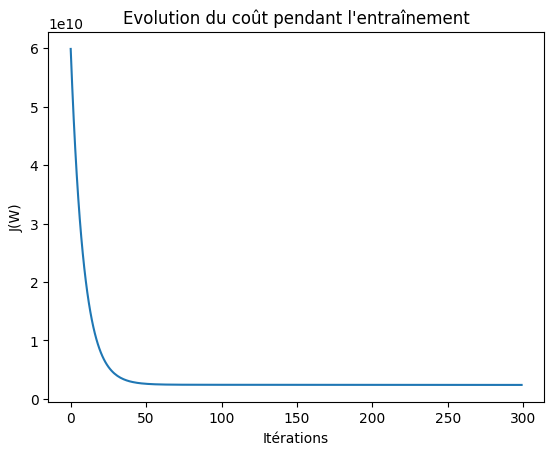

In [34]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

Visualisation de la variable prédite en fonction de la variable cible.

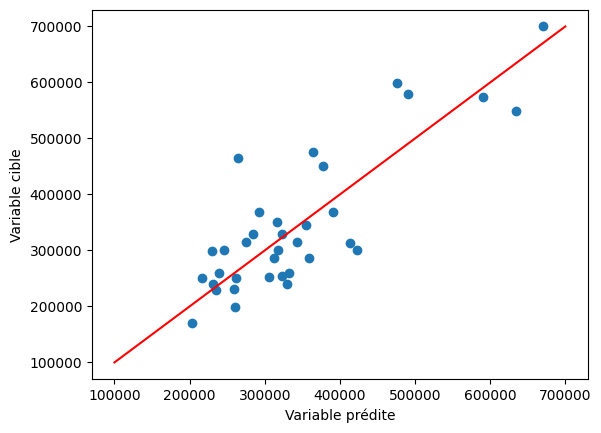

In [35]:
plt.scatter(lin_reg.predict(x_train_small), y_train)
plt.plot(np.arange(100000, 700000), np.arange(100000, 700000), color='red')
plt.ylabel('Variable cible')
plt.xlabel('Variable prédite')
plt.show()

Visualisation des coefficient du modèle.

In [36]:
lin_reg._w

array([[ 69182.06633264],
       [134134.51936892],
       [   203.73489062]])

Quelle est la variable la plus importante du modèle ?

**Votre réponse**

In [37]:
print('Moyenne variable 1 (population) : '+str(x_train_small[:, 0].mean()))
print('Moyenne variable 2 (note) : '+str(x_train_small[:, 1].mean()))

Moyenne variable 1 (population) : 2.0286857142857144
Moyenne variable 2 (note) : 0.003171428571428572


Comme les moyennes des variables sont différentes, les paramètres du modèle doivent s'y adapter.

Si les échelles des variables ne sont pas les mêmes il n'y a aucun moyen de savoir quel paramètre est le plus important.

# Normalisation des données avec sklearn

Pour l'utilisation d'un modèle linéaire, il est indispensable de passer par une étape de normalisation des données.

Cette étape permet de rendre le modèle interprétable mais aussi de faciliter la convergence du modèle.

N'hésitez pas à utiliser le [doc](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Initialisation de la classe avec aucun paramètre.

In [38]:
std = StandardScaler()

Entraînement de *std* en utilisant le fonction `fit`

In [39]:
std.fit(x_train)

StandardScaler()

Visualisez la moyenne et la variance calculer avec les attributs `mean_` et `var_`

In [40]:
print('Mean : '+str(std.mean_))
print('Std : '+str(std.var_))

Mean : [2028.68571429    3.17142857]
Std : [7.03100330e+05 6.56326531e-01]


Utilisez la méthode `transform` sur le train.

In [41]:
x_train_std = std.transform(x_train)

Afficher la moyenne et variance sur le jeu d'entraînement avant la standardisation.

In [42]:
print(x_train.mean(axis=0))
print(x_train.std(axis=0))

[2028.68571429    3.17142857]
[8.38510781e+02 8.10139822e-01]


Afficher la moyenne et variance sur le jeu d'entraînement après la standardisation.

In [43]:
print(x_train_std.mean(axis=0))
print(x_train_std.std(axis=0))

[-9.51619735e-18  2.15700473e-16]
[1. 1.]


Utilisation de la méthode `fit_transform` sur le jeu d'entraînement pour entraîner et appliquer sur le jeu d'entraînement en même temps.

In [44]:
x_train_std = std.fit_transform(x_train)

Affichez la moyenne et la variance obtenu sur `x_train_std`

In [45]:
print(x_train_std.mean(axis=0))
print(x_train_std.std(axis=0))

[-9.51619735e-18  2.15700473e-16]
[1. 1.]


## Gestion du train et du test

Initialisation des objets *StandardScaler*.

In [46]:
std1 = StandardScaler()
std2 = StandardScaler()

Utilisez la méthode `fit_transform` pour entraîné et appliquer le modèle sur le jeu d'entraînement et de test.

In [47]:
x_train_std = std1.fit_transform(x_train)
x_test_std = std2.fit_transform(x_test)

Visualisez la moyenne et la variance calculé par *std1*.

In [48]:
print('Mean : '+str(std1.mean_))
print('Std : '+str(std1.var_))

Mean : [2028.68571429    3.17142857]
Std : [7.03100330e+05 6.56326531e-01]


Visualisez la moyenne et la variance calculé par *std2*.

In [49]:
print('Mean : '+str(std2.mean_))
print('Std : '+str(std2.var_))

Mean : [1919.            3.16666667]
Std : [3.61280167e+05 3.05555556e-01]


Création d'un exemple

In [58]:
exemple = np.array([100, 1]).reshape(1, 2)
exemple

array([[100,   1]])

Appliquez *std1* sur *exemple*.

In [51]:
std1.transform(exemple)

array([[-2.30013228, -2.68031334]])

Appliquez *std2* sur *exemple*.

In [52]:
std2.transform(exemple)

array([[-3.02629067, -3.91964748]])

On peut voir que pour des mêmes valeurs les résultats seront différent s'ils ont été transformé par *std1* et *std2*.

## Bonne pratique

Intialisez qu'un seul *std*.

In [53]:
# Initialisation
std = StandardScaler()

Entraînement de *std* sur le jeu d'entraînement.

In [ ]:
# Training
std.fit(x_train)

Application de *std* sur le jeu d'entraînement et de test.

In [ ]:
# Transform
x_train_std = std.transform(x_train)
x_test_std = std.transform(x_test)

# Entraînement d'un modèle de régression linéaire

Initialisation du modèle de régression linéaire.

In [54]:
lin_reg = linear_regression(x_train_std)

<ipython-input-11-7d6c0a26d843>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J_history[i] = self.compute_cost(self.predict(x), y)


Entraînement du modèle.

In [ ]:
history = lin_reg.fit(x_train_std, y_train, learning_rate=0.1, num_iters=100)

Visualisation de l'évolution sur coût pendant l'entraînement.

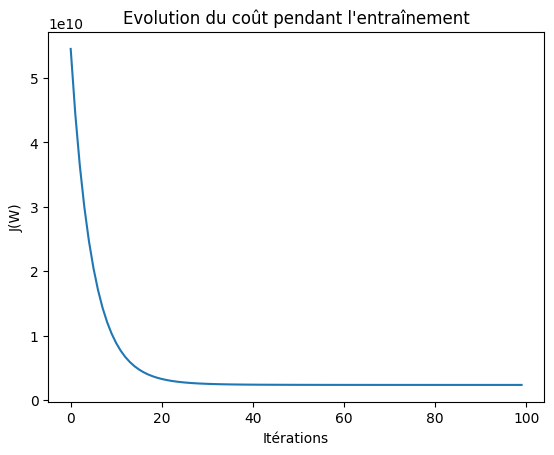

In [55]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

Visualisation de la performance du modèle.

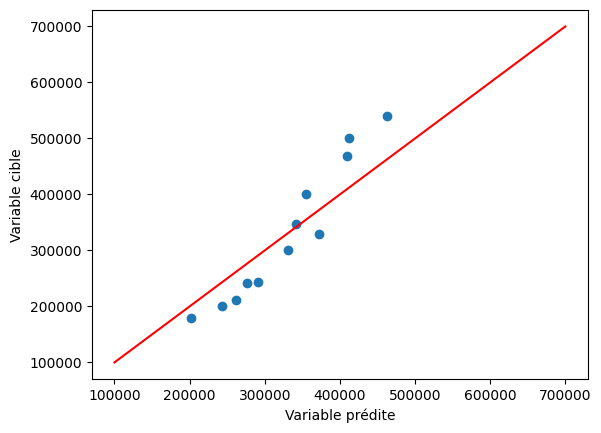

In [56]:
plt.scatter(lin_reg.predict(x_test_std), y_test)
plt.plot(np.arange(100000, 700000), np.arange(100000, 700000), color='red')
plt.ylabel('Variable cible')
plt.xlabel('Variable prédite')
plt.show()

Visualisation des paramètres du modèles.

In [57]:
lin_reg._w

array([[343893.63689743],
       [108235.85655312],
       [ -6810.34026641]])

Quelle est la variable la plus importante du modèle ?

**Votre réponse**